In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
import carla

In [2]:
act = carla.VehicleControl()

In [3]:
control_to_dict(act)

NameError: name 'control_to_dict' is not defined

In [4]:
def control_to_dict(vehicle_control):
    return {
    'steer': act.steer,
    'throttle': act.throttle,
    'brake': act.brake,
    'reverse': act.reverse,
    'hand_brake': act.hand_brake,
    'manual_gear_shift': act.manual_gear_shift,
    'gear': act.gear,
    }

In [2]:
with open("sensor_data.pickle", "rb") as fp: 
    sensor_data = pickle.load(fp)

In [26]:
with open("state.pickle", "rb") as fp: 
    state = pickle.load(fp)

In [27]:
state.keys()

dict_keys(['frame', 'accelerometer', 'gyroscope', 'compass', 'gnss', 'velocity', 'hd_map', 'front_sem'])

In [28]:
from PIL import Image

In [29]:
random_array = state['hd_map'] * 255
random_array = random_array.astype(np.uint8)
im = Image.fromarray(random_array)
im.save("hdmap.png")

In [30]:
random_array = state['front_sem'] * 255
random_array = random_array.astype(np.uint8)
im = Image.fromarray(random_array)
im.save("front_sem.png")

In [12]:
sensor_data.keys()

dict_keys(['bev_sem', 'GPS', 'IMU', 'front_rgb'])

In [13]:
sensor_data['bev_sem'][1].shape

(400, 500, 4)

In [14]:
sensor_data['front_rgb'][1]

array([[[121, 151, 155, 255],
        [125, 155, 159, 255],
        [131, 161, 163, 255],
        ...,
        [ 75,  91,  93, 255],
        [ 75,  93,  95, 255],
        [ 77,  95,  95, 255]],

       [[127, 157, 161, 255],
        [143, 172, 173, 255],
        [155, 184, 184, 255],
        ...,
        [ 73,  88,  90, 255],
        [ 71,  88,  90, 255],
        [ 73,  90,  91, 255]],

       [[131, 162, 164, 255],
        [148, 179, 180, 255],
        [166, 193, 194, 255],
        ...,
        [ 71,  88,  90, 255],
        [ 71,  90,  90, 255],
        [ 71,  90,  90, 255]],

       ...,

       [[ 77,  93,  95, 255],
        [ 81,  95,  96, 255],
        [ 83,  96,  98, 255],
        ...,
        [ 85,  88,  90, 255],
        [ 86,  88,  90, 255],
        [ 85,  88,  90, 255]],

       [[ 73,  90,  90, 255],
        [ 73,  90,  91, 255],
        [ 75,  91,  93, 255],
        ...,
        [ 86,  90,  91, 255],
        [ 85,  88,  90, 255],
        [ 86,  88,  90, 255]],

       [[ 71

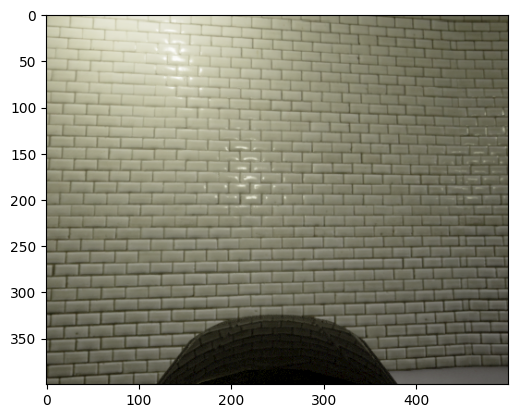

In [15]:
plt.imshow(sensor_data['front_rgb'][1][:,:,2::-1])

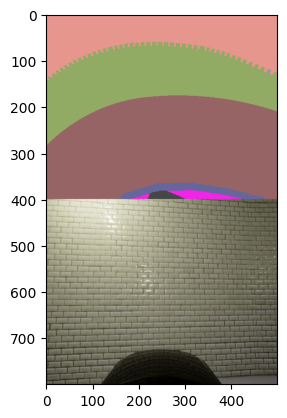

In [3]:
plt.imshow(np.concatenate([sensor_data['bev_sem'][1][:,:,2::-1],
                sensor_data['front_rgb'][1][:,:,2::-1]], axis=0))

In [83]:
sensor_setup = 'hd_map'
assert sensor_setup in ['hd_map']
processed_data = {}
processed_data['frame'] = sensor_data['IMU'][0]
processed_data['imu'] = sensor_data['IMU'][1]
processed_data['gps'] = sensor_data['GPS'][1]
processed_data['hd_map'] = flip(sensor_data['bev_sem'][1])
processed_data['front_rgb'] = flip(sensor_data['front_rgb'][1])

In [78]:
processed_data

{'frame': 343,
 'imu': array([ 5.22230387e-01, -1.80927292e-02,  9.79345608e+00, -1.59531110e-03,
        -3.80094280e-05, -1.09311938e-03,  1.19364905e+00]),
 'gps': array([1.63797476e-03, 2.19170274e-03, 1.74227929e+00]),
 'hd_map': array([[[230, 150, 140],
         [230, 150, 140],
         [230, 150, 140],
         ...,
         [230, 150, 140],
         [230, 150, 140],
         [230, 150, 140]],
 
        [[230, 150, 140],
         [230, 150, 140],
         [230, 150, 140],
         ...,
         [230, 150, 140],
         [230, 150, 140],
         [230, 150, 140]],
 
        [[230, 150, 140],
         [230, 150, 140],
         [230, 150, 140],
         ...,
         [230, 150, 140],
         [230, 150, 140],
         [230, 150, 140]],
 
        ...,
 
        [[150, 100, 100],
         [150, 100, 100],
         [150, 100, 100],
         ...,
         [150, 100, 100],
         [150, 100, 100],
         [150, 100, 100]],
 
        [[150, 100, 100],
         [150, 100, 100],
       

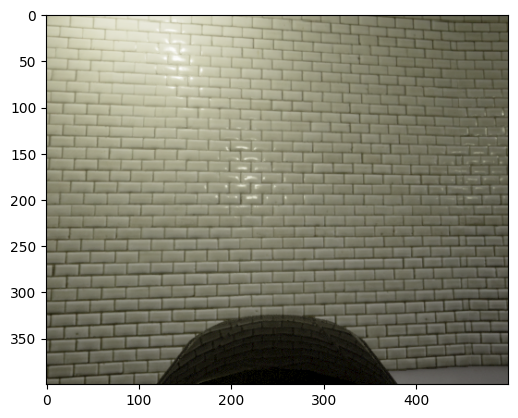

In [84]:
plt.imshow(processed_data['front_rgb'])

In [82]:
flip = lambda x: x[:,:,2::-1]